In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib as im

In [112]:
%matplotlib inline

In [5]:
train_data = pd.read_csv("../data/train_test/train(in scope).csv")

In [7]:
train_data.head()

,Unnamed: 0,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,...,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
1,1,2000475085-10,Purchase order item updated,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000475085-10,Purchase order item updated - amount,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000475085-10,Purchase order item updated - quantity,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000475085-10,Goods Return (Goods Receipt for Purchase Order),Goods Return,Delivery (in scope),2014-10-10 03:15:16,2014-10-10 03:15:16,2014-10-10 00:00:00,NaN,3000.0,...,NaN,NaN,NaN,Goods Return (Goods Receipt for Purchase Order...,NaN,NaN,NaN,NaN,NaN,NaN


# Getting in scope data

In [3]:
data = pd.read_csv("../data/pwc_data_merge/final.csv")

/Users/nikitakrutoy/.pyenv/versions/3.6.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17,18,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
data.head()

,Unnamed: 0,Unnamed: 0.1,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,...,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,0,2000475082-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:14:59,2014-10-01 00:00:00,NaN,NaN,...,NaN,2420,0.02,2420,0.02,4840.0,0.04,NaN,NaN,NaN
1,1,2,2000475084-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:15:50,2014-10-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2.0,-565.50,NaN,NaN,NaN
2,2,4,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,...,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32,NaN,NaN,NaN
3,3,6,2000475082-10,PO release - Approved,Approved,Document management - PO approval - status,2014-10-01 01:17:54,NaN,NaN,NaN,...,PO release - Approved-Not set,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,2000475082-10,PO release - RELEASED (10% delta possible),RELEASED (10% delta possible),Document management - PO approval - indicator,2014-10-01 01:17:54,NaN,NaN,NaN,...,PO release - RELEASED (10% delta possible)-Not...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for feature in data.columns:
    if "Unnamed" in feature:
        del data[feature]

In [25]:
data.head()

,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,...,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,2000475082-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:14:59,2014-10-01 00:00:00,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,2420,0.02,2420,0.02,4840.0,0.04
1,2000475084-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:15:50,2014-10-01 00:00:00,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,-565.50
2,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
3,2000475082-10,PO release - Approved,Approved,Document management - PO approval - status,2014-10-01 01:17:54,NaN,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,PO release - Approved-Not set,NaN,NaN,NaN,NaN,NaN,NaN
4,2000475082-10,PO release - RELEASED (10% delta possible),RELEASED (10% delta possible),Document management - PO approval - indicator,2014-10-01 01:17:54,NaN,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,PO release - RELEASED (10% delta possible)-Not...,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
np.unique(data["SIMPLIFIED EVENT"])

array([' cancel)', 'Approved', 'BLOCKED', 'Blocked',
       'Clearing (Credit memo)', 'Clearing (Invoice)',
       'Consumption (Subcontracting)', 'Credit Note',
       'Credit Note header updated', 'Credit Note item updated',
       'Delivery (Stock Transfer)', 'Goods Issue for Stock Transfer',
       'Goods Reciept', 'Goods Return', 'Invoice Reciept',
       'Invoice Reciept (Logistics invoice) blocked',
       'Invoice Reciept (Logistics invoice) released',
       'Invoice Reciept header updated', 'Invoice Reciept item updated',
       'Permanently blocked', 'Purchase order',
       'Purchase order header updated', 'Purchase order item updated',
       'Purchase requisition', 'Purchase requisition item updated',
       'RELEASED', 'RELEASED (10% delta possible)',
       'RELEASED (5% delta possible)', 'Service Entry Sheet'],
      dtype=object)

In [41]:
case_ids = np.unique(data["CASE"])
in_scope_case_ids = []
for case_id in case_ids:
    case = data[data["CASE"] == case_id]
    events = list(case["SIMPLIFIED EVENT"])
    purchase_order = "Purchase order" in events
    clearing = "Clearing (Credit memo)" in events or "Clearing (Invoice)" in events
    goods_return = 'Goods Return' in events
    if purchase_order and clearing or purchase_order and goods_return:
        in_scope_case_ids.append(case_id)

In [42]:
len(in_scope_case_ids)

1526

In [45]:
in_scope_data = data.set_index("CASE").loc[in_scope_case_ids]

In [49]:
in_scope_data.reset_index(inplace=True)

In [50]:
in_scope_data.head()

,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,...,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
1,2000475085-10,Purchase order item updated,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000475085-10,Purchase order item updated - amount,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000475085-10,Purchase order item updated - quantity,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000475085-10,Goods Return (Goods Receipt for Purchase Order),Goods Return,Delivery (in scope),2014-10-10 03:15:16,2014-10-10 03:15:16,2014-10-10 00:00:00,NaN,3000,Unknown,...,NaN,NaN,NaN,Goods Return (Goods Receipt for Purchase Order...,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
in_scope_data.to_csv("../data/final(in_scope).csv")

In [298]:
data = pd.read_csv("../data/final(in_scope).csv",index_col=0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
events = data[["CASE", "SIMPLIFIED EVENT"]]

In [34]:
for i, date in enumerate(data["SYS DATE"]):
    if len(date) != 19:
        print(date, i)
        print(data["CREATION DATE"][i])
        print(data["DOCUMENT DATE"][i])

In [299]:
data["SYS DATE"][6376] = data["CREATION DATE"][6376]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
data.head()

,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,...,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
1,2000475085-10,Purchase order item updated,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000475085-10,Purchase order item updated - amount,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000475085-10,Purchase order item updated - quantity,Purchase order item updated,Document management - PO,2014-10-10 03:02:09,NaN,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000475085-10,Goods Return (Goods Receipt for Purchase Order),Goods Return,Delivery (in scope),2014-10-10 03:15:16,2014-10-10 03:15:16,2014-10-10 00:00:00,NaN,3000.0,Unknown,...,NaN,NaN,NaN,Goods Return (Goods Receipt for Purchase Order...,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
data.sort_values("SYS DATE", inplace=True)

In [31]:
data.head()

,CASE,EVENT,SIMPLIFIED EVENT,EVENT TYPE,SYS DATE,CREATION DATE,POSTING DATE,DOCUMENT DATE,Company Code,Company Code Description,...,Vendor Industry,Company Code Country,EVENT AND USER,EVENT AND DOCTYPE,INVOICES_Q,INVOICES_A,GOODS RECIEVED_Q,GOODS RECIEVED_A,POS_Q,POS_A
0,2000475085-10,Purchase order,Purchase order,Purchasing document,2014-10-01 01:17:29,2014-10-01 00:00:00,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,-3140,-196.66,-6280.0,-393.32
11,2000475831-10,Purchase order,Purchase order,Purchasing document,2014-10-01 03:47:03,2014-10-01 00:00:00,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,100000,156000,100000,150000.00,200000.0,312000.00
13,2000475831-10,PO release - RELEASED (10% delta possible),RELEASED (10% delta possible),Document management - PO approval - indicator,2014-10-01 03:49:14,NaN,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,PO release - RELEASED (10% delta possible)-Not...,NaN,NaN,NaN,NaN,NaN,NaN
12,2000475831-10,PO release - Approved,Approved,Document management - PO approval - status,2014-10-01 03:49:14,NaN,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,PO release - Approved-Not set,NaN,NaN,NaN,NaN,NaN,NaN
5,2000475591-10,Purchase order,Purchase order,Purchasing document,2014-10-01 04:04:31,2014-10-01 00:00:00,NaN,NaN,3000.0,Unknown,...,NaN,NaN,NaN,NaN,1008,3536.45,1008,3638.88,2016.0,7072.90


# Baseline

## Event in case precense enoding

In [21]:
from tqdm import tqdm_notebook

In [238]:
def case_encoder(case, event2letter):
    return "".join([event2letter[event] for event in case])

def case_decoder(case, letter2event):
    return [letter2event[letter] for letter in case]

def get_event2letter(events):
    size = len(events)
    letters = [chr(i)  for i in range(ord("A"), ord("A") + 26)] + [chr(i) for i in range(ord("a"), ord("a") + size - 26)]
    event2letter = dict(zip(events, letters))
    letter2event = dict(zip(letters, events))
    return event2letter, letter2event

events = np.unique(data["SIMPLIFIED EVENT"])

event2letter, letter2event = get_event2letter(events)
event2index = dict([(i[1], i[0]) for i in list(enumerate(np.unique(data["SIMPLIFIED EVENT"])))])

In [239]:
case_ids = np.unique(data["CASE"])
paths = set()
for case_id in tqdm_notebook(case_ids):
    case = data[data["CASE"] == case_id]["SIMPLIFIED EVENT"]
    paths.add(case_encoder(case, event2letter))
paths = list(paths)

In [240]:
len(paths)

760

In [95]:
case_ids = np.unique(data["CASE"])
event2index = dict([(i[1], i[0]) for i in list(enumerate(np.unique(data["SIMPLIFIED EVENT"])))])
size = len(event2index.items())
vectors = []
for path in paths:
    desc = np.zeros(size)
    events = case_decoder(path, letter2event)
    for event in events:
        desc[event2index[event]] = 1
    vectors.append(desc)
    

In [96]:
cases = vectors

In [97]:
from kmodes.kmodes import KModes

In [98]:
kmodes = KModes(n_clusters=2)

In [99]:
clusters = kmodes.fit_predict(cases)

In [100]:
sum(clusters == 1)

375

In [101]:
sum(clusters == 0)

385

In [102]:
from sklearn.metrics import silhouette_score

In [103]:
def matching_dissim(a, b):
    return np.sum(np.array(a) != np.array(b))

# silhouette_score()

In [104]:
silhouette_score(cases, clusters, metric=matching_dissim)

0.5537216011882072

In [105]:
cases = np.array(cases)

In [106]:
cluster1 = cases[clusters == 0]
cluster2 = cases[clusters == 1]

In [107]:
bars1 = np.sum(cluster1, axis=0) / np.sum(cluster1)

In [108]:
bars2 = np.sum(cluster2, axis=0) / np.sum(cluster2)

In [109]:
import seaborn as sns

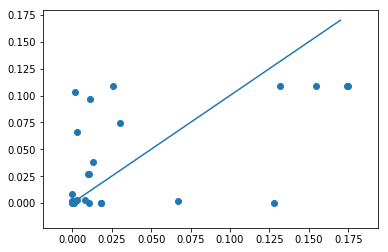

In [113]:
plt.scatter(bars1, bars2)
x = np.arange(0, 0.175, 0.01)
plt.plot(x, x)

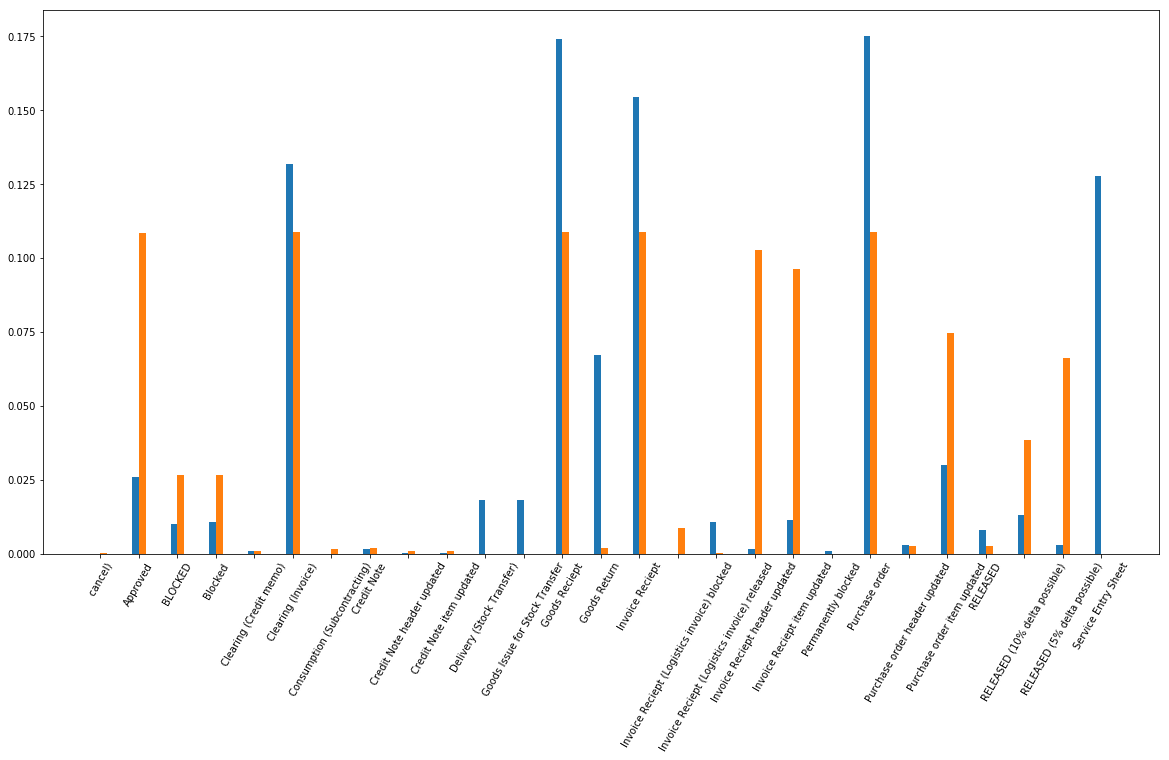

In [114]:
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.35  # the width of the bars
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]

ind = np.arange(0, 2*(size), 2)
ax.bar(ind - width/2 , bars1, width=width, )
ax.bar(ind + width/2, bars2, width=width, )
ax.set_xticks(ind);
ax.set_xticklabels(labels=events, rotation=60);

In [115]:
from scipy.spatial.distance import cdist
from collections import Counter


def in_cluster_distance(X, clusters, metric="euclidean"):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        centroid = np.mean(cluster, axis=0)
        distances.append(np.mean(cdist([centroid], cluster, metric=metric)))
    return distances

def cat_in_cluster_distance(X, clusters, centroids , metric="euclidean"):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name, centroid in zip(clusters_names, centroids):
        cluster = X[clusters == cluster_name]
        distances.append(np.mean(cdist([centroid], cluster, metric=metric)))
    return distances

def between_cluster_distance(X, clusters, metric="euclidean"):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        other_clusters = X[clusters != cluster_name]
        
        distances.append(np.mean(cdist(cluster, other_clusters, metric=metric)))
    return distances

def cluster_sizes(X, clusters):
    sizes = []
    for cluster in np.unique(clusters):
        sizes.append(np.sum(clusters == cluster))
    return sizes

def get_cluster_dist(cluster, event2index, p):
    events_num = len(event2index)
    probs = np.zeros((p, events_num))
    p_cases = np.array([case for case in cluster if len(case) == p])
    print(p_cases.shape)
    for i in range(p):
        p_events = p_cases[:, i]
        counts = Counter(p_events)
        size = p_events.size
        for event in counts.keys():
            probs[i][event2index[event]] = counts[event] / size
    return probs

def likelihood(cluster_dist, case, event2index):
    result = 0
    p = cluster_dist.shape[0]
    assert len(case) == p
    for i, event in enumerate(case):
        result += -np.log(cluster_dist[i][event2index[event]])
    return result
            
# def dunn_index(X, clusters, centroids, metric="euclidean"):
#     clusters_names = np.unique(clusters)
#     distances = []
#     for cluster_name, centroid in zip(clusters_names, centroids):
#         cluster = X[clusters == cluster_name]
#         distances.append(cdist([centroid], cluster, metric=metric)))
#     return distances
#     numerator = np.min()
    


In [116]:
cases_events = []
for path in paths:
    desc = np.zeros(size)
    events = case_decoder(path, letter2event)
    cases_events.append(events)

In [117]:
cases_events = np.array(cases_events)
cluster1 = cases_events[clusters == 0]
cluster2 = cases_events[clusters == 1]

In [118]:
centroid1 = kmodes.cluster_centroids_[0]
centroid2 = kmodes.cluster_centroids_[1]
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
for i, _ in enumerate(centroid1):

    if centroid1[i]:
        print(events[i])
    

Clearing (Invoice)
Goods Reciept
Invoice Reciept
Purchase order
Service Entry Sheet


In [119]:
for i, _ in enumerate(centroid2):

    if centroid2[i]:
        print(events[i])

Approved
Clearing (Invoice)
Goods Reciept
Invoice Reciept
Invoice Reciept header updated
Invoice Reciept item updated
Purchase order
Purchase order item updated
RELEASED (5% delta possible)


In [120]:
scores = []
for n_cluster in tqdm_notebook(range(2, 100, 5)):
    kmodes = KModes(n_clusters=n_cluster, n_init=10)
    clusters = kmodes.fit_predict(cases)
    score = silhouette_score(cases, clusters, metric=matching_dissim)
    print(n_cluster, score)
    scores.append(score)

2 0.5537216011882072
7 0.5820145473310779



KeyboardInterrupt: 

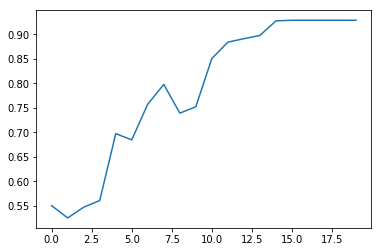

In [187]:
plt.plot(scores)

In [123]:
from sklearn.tree import DecisionTreeClassifier
from eli5 import explain_weights
dtc = DecisionTreeClassifier(criterion="entropy")

In [124]:
kmodes = KModes(n_clusters=2, n_init=10)
clusters = kmodes.fit_predict(cases)
dtc.fit(cases, clusters);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain_weights(dtc, feature_names=events)

Weight,Feature
0.8018,Invoice Reciept header updated
0.1266,RELEASED (5% delta possible)
0.0325,Purchase order item updated
0.0159,RELEASED
0.0128,Invoice Reciept item updated
0.0104,Approved


In [125]:
kmodes = KModes(n_clusters=100, n_init=10)
clusters = kmodes.fit_predict(cases)
dtc.fit(cases, clusters);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain_weights(dtc, feature_names=events)

Weight,Feature
0.2250,Invoice Reciept header updated
0.1256,Goods Return
0.1164,Purchase order item updated
0.1161,RELEASED (5% delta possible)
0.0710,BLOCKED
0.0677,Service Entry Sheet
0.0413,Clearing (Invoice)
0.0390,Invoice Reciept item updated
0.0389,Invoice Reciept (Logistics invoice) blocked
0.0281,Invoice Reciept


In [191]:
from sklearn.decomposition import PCA

In [192]:
pca = PCA(n_components=10)
X = pca.fit_transform(cases)

In [38]:
def test_kmeans(min_clusters=2 ,max_clusters=11, step=1, debug=True):
    scores = []
    cs = []
    for n_clusters in tqdm_notebook(range(min_clusters, max_clusters, step)):
        km = KMeans(n_clusters=n_clusters, n_init=100)
        clusters = km.fit_predict(X)
        score = silhouette_score(X, clusters)
        scores.append(score)
        cs.append(clusters)
        if debug:
            print(n_clusters, score)
    return scores, cs

In [198]:
scores, cs = test_kmeans(2, 83, 10, True)

2 0.4330923092683031
12 0.7047606115307914
22 0.7986375698175925
32 0.8702805053943328
42 0.9168566082986668
52 0.9281311266799053
62 0.9331069775241754
72 0.9330861552715441
82 nan



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


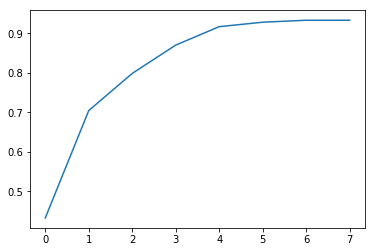

In [199]:
plt.plot(scores)

In [200]:
dtc.fit(cases, cs[2]);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain_weights(dtc, feature_names=events)

Weight,Feature
0.1694,Goods Return
0.1366,Purchase order item updated
0.1302,BLOCKED
0.1214,Service Entry Sheet
0.1026,Clearing (Invoice)
0.0834,Invoice Reciept item updated
0.0666,Invoice Reciept (Logistics invoice) blocked
0.0587,RELEASED (5% delta possible)
0.0546,Invoice Reciept header updated
0.0369,RELEASED (10% delta possible)


In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
pf = PolynomialFeatures(3, interaction_only=True)
X = pf.fit_transform(cases)

In [203]:
pca = PCA(n_components=20)
X = pca.fit_transform(X)

In [43]:
scores, cs = test_kmeans(2, 83, 10, True)

2 0.3755708575701763
12 0.5535834525234037
22 0.7189833814301827
32 0.8052899540888524
42 0.8613219725717731
52 0.9039528086214731
62 0.9181166334586184
72 0.9284913006478598
82 0.9285714285714286



In [205]:
dtc.fit(cases, cs[2]);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain_weights(dtc, feature_names=events)

Weight,Feature
0.1549,Goods Return
0.1273,Clearing (Invoice)
0.1267,Purchase order item updated
0.1150,Service Entry Sheet
0.0940,Blocked
0.0767,Invoice Reciept item updated
0.0548,RELEASED (10% delta possible)
0.0544,Invoice Reciept (Logistics invoice) blocked
0.0538,Invoice Reciept header updated
0.0522,RELEASED (5% delta possible)


## Event frequence encoding

In [206]:
case_ids = np.unique(data["CASE"])
event2index = dict([(i[1], i[0]) for i in list(enumerate(np.unique(data["SIMPLIFIED EVENT"])))])
size = len(event2index.items())
vectors = []
for path in paths:
    desc = np.zeros(size)
    events = case_decoder(path, letter2event)
    for event in events:
        desc[event2index[event]] = +1
    vectors.append(desc)

In [207]:
cases = vectors

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [209]:
ss = StandardScaler()
X = ss.fit_transform(cases)

In [210]:
scores, cs = test_kmeans(2, 30, 4, debug=True)

2 0.30297982956173014
6 0.43514366505092866
10 0.4755543996186085
14 0.5495111658190358
18 0.670355407781632
22 0.7239736258396939
26 0.7688106076614856



In [212]:
km = KMeans(n_clusters=2, n_init=100)
clusters = km.fit_predict(X)
cluster1 = np.array(cases)[clusters == 0]
cluster2 = np.array(cases)[clusters == 1]
silhouette_score(X, clusters)

0.30297982956173014

In [213]:
bars1 = np.sum(cluster1, axis=0) / np.sum(cluster1)
bars2 = np.sum(cluster2, axis=0) / np.sum(cluster2)

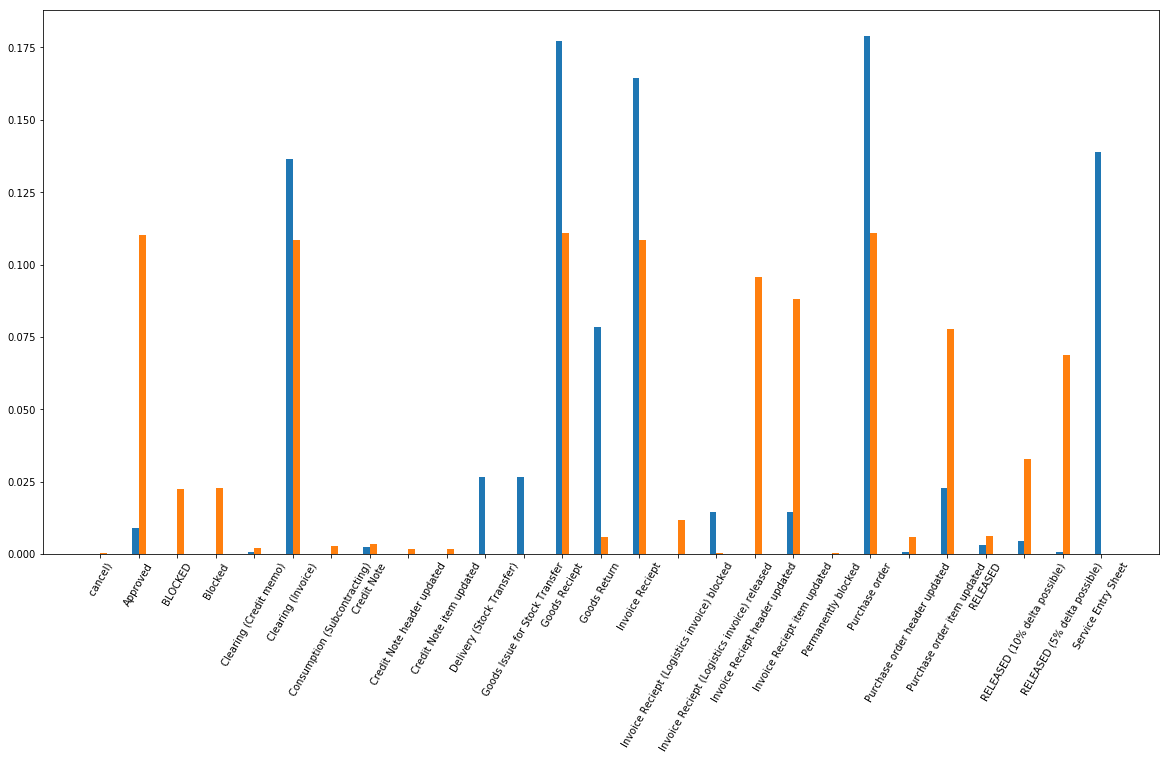

In [214]:
fig, ax = plt.subplots(figsize=(20, 10))
width = 0.35  # the width of the bars
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]

ind = np.arange(0, 2*(size), 2)
ax.bar(ind - width/2 , bars1, width=width, )
ax.bar(ind + width/2, bars2, width=width, )
ax.set_xticks(ind);
ax.set_xticklabels(labels=events, rotation=60);

In [215]:
dtc.fit(cases, clusters);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain_weights(dtc, feature_names=events)

Weight,Feature
0.8902,Approved
0.0467,Clearing (Invoice)
0.0361,Blocked
0.0171,Invoice Reciept header updated
0.0062,RELEASED (5% delta possible)
0.0036,Purchase order item updated


In [364]:
centroid1, centroid2 = km.cluster_centers_

In [365]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_plot = tsne.fit_transform(list(cases) + [centroid1] + [centroid2])

In [367]:
centroid1 = X_plot[-2]
centroid2 = X_plot[-1]
X_plot = X_plot[:-2]

In [369]:
sum(clusters == 1)

5

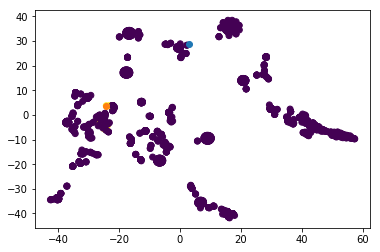

In [368]:
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=clusters)
plt.scatter(centroid1[0], centroid1[1])
plt.scatter(centroid2[0], centroid2[1])

In [216]:
km = KMeans(n_clusters=100, n_init=100)
clusters = km.fit_predict(X)
# cluster1 = np.array(cases)[clusters == 0]
# cluster2 = np.array(cases)[clusters == 1]
print(silhouette_score(X, clusters))
dtc.fit(cases, clusters);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain = explain_weights(dtc, feature_names=events)

0.9285714125338751


In [217]:
explain

Weight,Feature
0.1778,Goods Return
0.1217,Purchase order item updated
0.1068,Service Entry Sheet
0.0947,Invoice Reciept item updated
0.0914,Clearing (Invoice)
0.0663,Invoice Reciept (Logistics invoice) blocked
0.0380,Purchase order header updated
0.0375,Invoice Reciept header updated
0.0365,RELEASED (5% delta possible)
0.0355,Blocked


In [218]:
from sklearn.cluster import DBSCAN

In [219]:
for eps in [0.01, 0.05, 0.1, 0.5, 1, 3, 4, 5]:
    dbscan = DBSCAN(eps=eps)
    clusters = dbscan.fit_predict(X)
    clusters_num = len(np.unique(clusters))
    score = silhouette_score(X, clusters)
    print(eps, score, clusters_num)

0.01 0.7373904030944654 20
0.05 0.7373904030944654 20
0.1 0.7373904030944654 20
0.5 0.7373904030944654 20
1 0.7373904030944654 20
3 0.3044159919519891 10
4 0.3509401502499386 8
5 0.33500455875145024 6


In [220]:
dbscan = DBSCAN(eps=0.1)
clusters = dbscan.fit_predict(X)
score = silhouette_score(X, clusters)
print(score)

0.7373904030944654


In [221]:
dtc.fit(cases, clusters);
events = [event[0] for event in sorted(list(event2index.items()), key=lambda x: x[0])]
explain_weights(dtc, feature_names=events)

Weight,Feature
0.1774,Goods Return
0.1310,Service Entry Sheet
0.1028,Clearing (Invoice)
0.1027,Invoice Reciept item updated
0.0951,Purchase order item updated
0.0639,Invoice Reciept (Logistics invoice) blocked
0.0429,RELEASED (10% delta possible)
0.0410,RELEASED (5% delta possible)
0.0364,Delivery (Stock Transfer)
0.0347,Blocked


In [222]:
pca = PCA(n_components=10)
X = pca.fit_transform(X)

In [224]:
scores, cs = test_kmeans(2, 83, 10, True)

2 0.36891146619223353
12 0.6227989588303866
22 0.7635577607923465
32 0.8151148343011736
42 0.8391391452322404
52 0.892588793038562
62 0.9265821116273393
72 0.927486334372527
82 nan



/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in true_divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


In [223]:
cluster = cs[0]
np.sum(np.array(cluster) == 0)

253

# Levenshtein

In [24]:
import Levenshtein

In [25]:
def case_encoder(case, event2letter):
    return "".join([event2letter[event] for event in case])

def get_event2letter(events):
    size = len(events)
    letters = [chr(i)  for i in range(ord("A"), ord("A") + 26)] + [chr(i) for i in range(ord("a"), ord("a") + size - 26)]
    event2letter = dict(zip(events, letters))
    letter2event = dict(zip(letters, events))
    return event2letter, letter2event

events = np.unique(data["SIMPLIFIED EVENT"])

event2letter, letter2event = get_event2letter(events)
event2index = dict([(i[1], i[0]) for i in list(enumerate(np.unique(data["SIMPLIFIED EVENT"])))])

In [26]:
case_ids = np.unique(data["CASE"])
paths = set()
for case_id in tqdm_notebook(case_ids):
    case = data[data["CASE"] == case_id]["SIMPLIFIED EVENT"]
    paths.add(case_encoder(case, event2letter))

KeyboardInterrupt: 

In [35]:
from Levenshtein import distance

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
from scipy.spatial.distance import pdist, squareform

## Agglomirative clustering

In [38]:
affinity = squareform(pdist(np.array(list(paths)).reshape(-1, 1), metric=lambda x, y: distance(x[0], y[0])))

In [39]:
n_clusters = 2
ac = AgglomerativeClustering(n_clusters=n_clusters, affinity="precomputed", linkage="average")
clusters = ac.fit_predict(affinity)

In [ ]:
pdist(np.array(cluster)reshape(-1, 1), metric= )

In [52]:
from scipy.spatial.distance import cdist

In [81]:
def lev_in_cluster_distance(X, clusters):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        dists = squareform(pdist(np.array(cluster).reshape(-1, 1), metric=lambda x, y: distance(x[0], y[0])))
        distances.append(np.mean(dists))
    return distances

def lev_between_cluster_distance(X, clusters):
    clusters_names = np.unique(clusters)
    distances = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        other = X[clusters != cluster_name]
        dists = cdist(np.array(cluster).reshape(-1, 1), 
                      np.array(other).reshape(-1, 1), 
                      metric=lambda x, y: distance(x[0], y[0]))
        distances.append(np.mean(dists))
    return distances

def lev_centroids(X, clusters):
    clusters_names = np.unique(clusters)
    centroids = []
    for cluster_name in clusters_names:
        cluster = X[clusters == cluster_name]
        dists = cdist(np.array(cluster).reshape(-1, 1), 
                      np.array(cluster).reshape(-1, 1), 
                      metric=lambda x, y: distance(x[0], y[0]))
        mean_dists = np.mean(dists, axis=1)
        i = np.argmin(mean_dists)
        centroids.append(cluster[i])
    return centroids
        
def lev_sillhouette_score(X, clusters):
    clusters_names = np.unique(clusters)
    clusters_num = clusters_names.size
    scores = []
    centroids = lev_centroids(X, clusters)
    for point, cluster_name in tqdm_notebook(zip(X, clusters)):
        centroid_dists = cdist(
                    np.array([point]).reshape(-1, 1), 
                    np.array(centroids).reshape(-1, 1), 
                    metric=lambda x, y: distance(x[0], y[0])).reshape((clusters_num,))
        centroid_dists[cluster_name] = np.inf
        b = np.min(centroid_dists)
                      
        cluster = X[clusters == cluster_name]       
        a = np.mean(cdist(np.array([point]).reshape(-1, 1), 
                      np.array(cluster).reshape(-1, 1), 
                      metric=lambda x, y: distance(x[0], y[0])))
        scores.append((b - a) / max(a, b))
    return np.mean(scores)
        
    

affinity = squareform(pdist(np.array(list(paths)).reshape(-1, 1), metric=lambda x, y: distance(x[0], y[0])))
for n_clusters in range(2, 100, 10):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity="precomputed", linkage="average")
    clusters = ac.fit_predict(affinity)
    clusters_names = np.unique(clusters)
    
    sizes = np.array([len(clusters[clusters == i ]) for i in range(n_clusters)])
    mean_size = np.mean(sizes)
    good_clusters = np.arange(n_clusters)[sizes > mean_size]
#     true_clusters_flag = []
#     for cluster in clusters:
#         if cluster in true_clusters_names:
#             true_clusters_flag.append(True)
#         else:
#             true_clusters_flag.append(False)
#     true_clusters_flag = np.array(true_clusters_flag)
    
    in_cluster = np.array(lev_in_cluster_distance(np.array(paths), clusters))
    between_cluster = np.array(lev_between_cluster_distance(np.array(paths), clusters))
    centroids = np.array(lev_centroids(np.array(paths), clusters))
    silhouette = np.array(
        lev_sillhouette_score(
            np.array(paths), 
            clusters
        )
    )
    
    print("in cluster")
    print(in_cluster[in_cluster != 0])
    print(np.mean(in_cluster[in_cluster != 0]))
    print("between cluster")
    print(between_cluster)
    print(np.mean(between_cluster))
    print("centroids")
    print(centroids[good_clusters])
    print("silhouette")
    print(silhouette)
    print(n_clusters, sizes)
    print(mean_size, good_clusters)
    print()


in cluster
[20.25       12.05575502]
16.1528775090283
between cluster
[39.61078042 39.61078042]
39.610780423280424
centroids
['UaMaMaMOF']
silhouette
0.6201945132258834
2 [  4 756]
380.0 [1]


in cluster
[11.39970801  9.77777778  8.75        9.83333333  7.55555556]
9.463274935302518
between cluster
[27.24240458 19.07441656 21.1848545  29.93280283 27.48612946 20.22661397
 45.56126482 42.01449275 38.16469038 20.2002635  32.50329381 26.05401845]
29.137103800061738
centroids
['UaMaMaMOF']
silhouette
0.34873649157144626
12 [737   3   4   6   3   1   1   1   1   1   1   1]
63.333333333333336 [0]


in cluster
[10.84429066  8.72        8.72029321  6.          7.89259694  5.77777778
  8.98459184  5.5         7.55555556  4.        ]
7.399510598028968
between cluster
[16.47715937 28.4815894  14.20754603 18.44656992 15.77307051 20.12549538
 16.25464286 24.3030303  15.52836412 16.19235837 27.48612946 26.05401845
 20.22661397 20.31225296 45.56126482 42.01449275 20.95652174 38.16469038
 15.10488127 

In [82]:
event2letter

{' cancel)': 'A',
 'Approved': 'B',
 'BLOCKED': 'C',
 'Blocked': 'D',
 'Clearing (Credit memo)': 'E',
 'Clearing (Invoice)': 'F',
 'Consumption (Subcontracting)': 'G',
 'Credit Note': 'H',
 'Credit Note header updated': 'I',
 'Credit Note item updated': 'J',
 'Delivery (Stock Transfer)': 'K',
 'Goods Issue for Stock Transfer': 'L',
 'Goods Reciept': 'M',
 'Goods Return': 'N',
 'Invoice Reciept': 'O',
 'Invoice Reciept (Logistics invoice) blocked': 'P',
 'Invoice Reciept (Logistics invoice) released': 'Q',
 'Invoice Reciept header updated': 'R',
 'Invoice Reciept item updated': 'S',
 'Permanently blocked': 'T',
 'Purchase order': 'U',
 'Purchase order header updated': 'V',
 'Purchase order item updated': 'W',
 'RELEASED': 'X',
 'RELEASED (10% delta possible)': 'Y',
 'RELEASED (5% delta possible)': 'Z',
 'Service Entry Sheet': 'a'}

## Affinity Propogation

In [116]:
from sklearn.cluster import AffinityPropagation

In [120]:
ap = AffinityPropagation(affinity="precomputed")

In [121]:
clusters = ap.fit_predict(affinity)

In [122]:
len(np.unique(clusters))

2

In [131]:
np.array(list(paths))[clusters == 0]

array(['UBYMOMFOMFOPRSSSF', 'UBYMOMORSMRSOFFMRSOF',
       'UWBZMMORSSSORSFMORMFOF', 'UBYMORSFMOMFORSF', 'UBZMMRSSSSOORSF',
       'UBYWWMMRSSSOOPRSSSMFMPRSSSOF', 'UBZMMWMORSSSORSSSSRSSSSOF',
       'UBZWMMMORSSSSORSSSSORSSSF', 'UBZCDWWWBZWWWGMGMRSSOORSSFGMORSF',
       'UBYWWWWMORSSSSSOF', 'UWBZMORSRSSSSOFMORFMORSF',
       'UaMaaMaMaMaMaMaMaMaMaMaMaMaMaMaMaMaMaMaNMaO',
       'UBYWWWMMMRSOFORORSF', 'UBZMMORSORSSSSMORSF',
       'UBZMMORSSSSORSSSSFF', 'UBZCDWWWBZMMMMORSSORSSSSMFRSSSORSSSOFORFW',
       'UBYMORSFMOMOFMOFFW', 'UBYCDWBYMOORSSSSSF',
       'UBZMMWWMORSSSSORSSSRSSSSOF', 'UBYWMMROOFMORSMMFOPRSSSFWHO',
       'UWBZMMRSSSOOPRSSSSORFMNNNNNNMORSF', 'UBYMOFMORSFMRSOF',
       'UBYWWWMORSSSSSOF', 'UBYMOMOFFMORSFMRSOF', 'UBZMMORSORSSSSMORSSF',
       'UBYMORSFMORSFMRSOF', 'UBYMORSFMORSFMOF', 'UBZWWWGMGMORSSORSSSF',
       'UBZMPRSSOMOPRSSFF', 'UBYWMMRSOFMRSOORSFF',
       'UWBZMORSSSFOPRSSSSFMORSF', 'UBZCDBZWWWWWMMORSSSORSSSSF',
       'UBZMOPRSSMPRSSOMFOPRSSFF', 'UBZMOPRSSSMMRSSS

# Patterns

In [225]:
!pip3 install pymining

In [227]:
from pymining.seqmining import freq_seq_enum

In [ ]:
freqs = freq_seq_enum(paths, 2)

In [8]:
import pickle

In [18]:
cases_events = []
for path in paths:
    events = case_decoder(path, letter2event)
    cases_events.append(events)

In [21]:
f = open("../data/objects/paths", "wb")
pickle.dump(cases_events, f)

In [22]:
f.close()

In [203]:
with open("../data/objects/paths_text.txt", "w") as f:
    for path in paths:
        p = [str(event2index[letter2event[letter]]) for letter in list(path)[1:]]
        f.write(" -1 ".join(p) + " -2\n")

In [204]:
seqs = []
with open("../data/objects/freqs.txt", "r") as f:
    while True:
        line  = f.readline()
        if not line:
            break
        seq, support = line.split("#")
        seq = seq.split(" -1 ")[:-1]
        support = int(support.split(" ")[1])
        seqs.append([seq, support])
#         print(seq, support)

In [205]:
seqs = sorted(seqs, key=lambda x: x[1], reverse=True)

In [212]:
most_common_seqs = set()

for n in range(2, 3):
    for i in range(len(event2index)):
        for seq, _ in seqs:
            str_seq = " ".join(seq)
            if str(i) in seq and len(seq) == n and str_seq not in most_common_seqs:
                most_common_seqs.add(str_seq)
                break

In [213]:
len(list(most_common_seqs))

14

In [214]:
events = np.unique(data["SIMPLIFIED EVENT"])

In [215]:
named_seqs = []
for seq in most_common_seqs:
    named_seqs.append(" ".join([events[int(i)] for i in seq.split()]))

In [216]:
named_seqs

['Service Entry Sheet Invoice Reciept',
 'Invoice Reciept Clearing (Invoice)',
 'RELEASED (5% delta possible) Goods Reciept',
 'Approved Goods Reciept',
 'Approved Blocked',
 'Goods Reciept Goods Return',
 'Approved BLOCKED',
 'Goods Reciept Invoice Reciept item updated',
 'Approved Invoice Reciept',
 'RELEASED (10% delta possible) Goods Reciept',
 'Purchase order Invoice Reciept',
 'Approved Purchase order item updated',
 'Goods Reciept Invoice Reciept header updated',
 'Goods Reciept Invoice Reciept']

In [217]:
vectors = []

for path in tqdm_notebook(paths):
    desc = np.zeros(len(named_seqs))
    events = " ".join(case_decoder(path, letter2event))
    for i, named_seq in enumerate(named_seqs):
        if named_seq in events:
            desc[i] = 1
    vectors.append(desc)

In [218]:
vectors[0]

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [219]:
len(vectors)

760

In [220]:
vectors = np.array(vectors)

In [221]:
zero_items_flag = np.apply_along_axis(lambda x: not x.any() ,axis=1, arr=vectors,)

In [222]:
np.sum(zero_items_flag)

18

In [223]:
zero_paths = np.array(paths)[zero_items_flag]
paths = np.array(paths)[np.logical_not(zero_items_flag)]

In [224]:
zero_paths

array(['aMUaNO', 'UMaaMMaaMMaNMa', 'UBZWMWOSRF', 'UaaMaMMaNO', 'UWN',
       'aMUaMaMaMMaMaaaMMaNMaNO', 'UKLOMWWWQSF', 'UNNMW', 'UMaaNO',
       'UBYWWWMCDBYOSORSSSF', 'UMaaMaaMMaNaM', 'aMUN', 'UWWWN', 'UMaNMa',
       'UBXMVN', 'MaUMaNO', 'UNMWWWNH', 'UaMaMaMaaMaMaaMMaaMMaaMMaNO'],
      dtype='<U54')

In [225]:
new_vectors = vectors[np.logical_not(zero_items_flag)]

In [226]:
scores = []
cs = []
for n_cluster in tqdm_notebook(range(2, 11)):
    kmodes = KModes(n_clusters=n_cluster, n_init=10)
    clusters = kmodes.fit_predict(new_vectors)
    score = silhouette_score(new_vectors, clusters, metric=matching_dissim)
    print(n_cluster, score, cluster_sizes(vectors, clusters))
    scores.append(score)
    cs.append(clusters)

2 0.33783318580866933 [652, 90]
3 0.238510566635497 [652, 63, 27]
4 0.16436576202620895 [554, 63, 27, 98]
5 0.16984174215207476 [509, 61, 27, 62, 83]
6 0.16592708601781583 [513, 31, 27, 60, 84, 27]
7 0.19875779288889153 [479, 31, 27, 94, 78, 27, 6]
8 0.17348970159183233 [464, 31, 27, 87, 69, 26, 5, 33]
9 0.21132563790318334 [441, 31, 27, 70, 69, 26, 5, 33, 40]
10 0.20879893229319482 [441, 31, 27, 64, 54, 26, 5, 33, 40, 21]



In [142]:
clusters6 = cs[4]

In [ ]:
print(clusters)

# Word2Vec

In [241]:
case_ids = np.unique(data["CASE"])
event2index = dict([(i[1], i[0]) for i in list(enumerate(np.unique(data["SIMPLIFIED EVENT"])))])
size = len(event2index.items())
cases = []
for path in paths:
    desc = np.zeros(size)
    events = case_decoder(path, letter2event)
    events = ["_".join(event.split()) for event in events]
    cases.append(events)

In [242]:
from gensim.models import Word2Vec

In [243]:
wv = Word2Vec(cases, window=3, sg=0, compute_loss=True, hs=1, sorted_vocab=1, iter=100, size=10)

DEBUG:gensim.models.word2vec:Fast version of gensim.models.word2vec is being used
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 27 word types from a corpus of 10647 raw words and 760 sentences
INFO:gensim.models.word2vec:Loading a fresh vocabulary
INFO:gensim.models.word2vec:min_count=5 retains 25 unique words (92% of original 27, drops 2)
INFO:gensim.models.word2vec:min_count=5 leaves 10644 word corpus (99% of original 10647, drops 3)
INFO:gensim.models.word2vec:deleting the raw counts dictionary of 27 items
INFO:gensim.models.word2vec:sample=0.001 downsamples 18 most-common words
INFO:gensim.models.word2vec:downsampling leaves estimated 1517 word corpus (14.3% of prior 10644)
INFO:gensim.models.word2vec:estimated required memory for 25 words and 10 dimensions: 20500 bytes
INFO:gensim.models.word2vec:constructing a huffman tree from 25

In [139]:
np.unique(data["SIMPLIFIED EVENT"])

array([' cancel)', 'Approved', 'BLOCKED', 'Blocked',
       'Clearing (Credit memo)', 'Clearing (Invoice)',
       'Consumption (Subcontracting)', 'Credit Note',
       'Credit Note header updated', 'Credit Note item updated',
       'Delivery (Stock Transfer)', 'Goods Issue for Stock Transfer',
       'Goods Reciept', 'Goods Return', 'Invoice Reciept',
       'Invoice Reciept (Logistics invoice) blocked',
       'Invoice Reciept (Logistics invoice) released',
       'Invoice Reciept header updated', 'Invoice Reciept item updated',
       'Permanently blocked', 'Purchase order',
       'Purchase order header updated', 'Purchase order item updated',
       'RELEASED', 'RELEASED (10% delta possible)',
       'RELEASED (5% delta possible)', 'Service Entry Sheet'],
      dtype=object)

In [86]:
wv.wv.vocab

{'Approved': <gensim.models.keyedvectors.Vocab at 0x117b6d2b0>,
 'BLOCKED': <gensim.models.keyedvectors.Vocab at 0x117b6d0f0>,
 'Blocked': <gensim.models.keyedvectors.Vocab at 0x117b66e10>,
 'Clearing_(Credit_memo)': <gensim.models.keyedvectors.Vocab at 0x117b6d400>,
 'Clearing_(Invoice)': <gensim.models.keyedvectors.Vocab at 0x117b66f28>,
 'Consumption_(Subcontracting)': <gensim.models.keyedvectors.Vocab at 0x117b6d3c8>,
 'Credit_Note': <gensim.models.keyedvectors.Vocab at 0x117b66f60>,
 'Credit_Note_header_updated': <gensim.models.keyedvectors.Vocab at 0x117b6d240>,
 'Credit_Note_item_updated': <gensim.models.keyedvectors.Vocab at 0x117b66fd0>,
 'Delivery_(Stock_Transfer)': <gensim.models.keyedvectors.Vocab at 0x117b6d208>,
 'Goods_Issue_for_Stock_Transfer': <gensim.models.keyedvectors.Vocab at 0x117b6d390>,
 'Goods_Reciept': <gensim.models.keyedvectors.Vocab at 0x117b6d160>,
 'Goods_Return': <gensim.models.keyedvectors.Vocab at 0x117b6d0b8>,
 'Invoice_Reciept': <gensim.models.keyedv

In [87]:
wv.wv.most_similar("Service_Entry_Sheet")

[('Goods_Reciept', 0.5907841920852661),
 ('Goods_Return', 0.5247223973274231),
 ('Purchase_order', 0.07924050837755203),
 ('Clearing_(Invoice)', -0.13084347546100616),
 ('Invoice_Reciept', -0.13115791976451874),
 ('Goods_Issue_for_Stock_Transfer', -0.17621469497680664),
 ('Credit_Note', -0.27927863597869873),
 ('Invoice_Reciept_(Logistics_invoice)_released', -0.29968610405921936),
 ('Delivery_(Stock_Transfer)', -0.42613187432289124),
 ('RELEASED', -0.4333307147026062)]

In [48]:
wv.wv.vocab.keys()

dict_keys(['Invoice_Reciept_item_updated', 'Goods_Return', 'Credit_Note_item_updated', 'Service_Entry_Sheet', 'Blocked', 'Purchase_order', 'Goods_Reciept', 'Approved', 'Credit_Note_header_updated', 'Purchase_order_item_updated', 'RELEASED_(10%_delta_possible)', 'Goods_Issue_for_Stock_Transfer', 'Invoice_Reciept_header_updated', 'Invoice_Reciept', 'Invoice_Reciept_(Logistics_invoice)_blocked', 'RELEASED', 'BLOCKED', 'Purchase_order_header_updated', 'Clearing_(Invoice)', 'Clearing_(Credit_memo)', 'RELEASED_(5%_delta_possible)', 'Invoice_Reciept_(Logistics_invoice)_released', 'Credit_Note', 'Consumption_(Subcontracting)', 'Delivery_(Stock_Transfer)'])

In [88]:
sims = []
for event in wv.wv.vocab.keys():
    sims.append((event, wv.wv.similar_by_word(event, topn=5)))
sims = dict(sims)

In [89]:
sims

{'Approved': [('Purchase_order_item_updated', 0.7954357862472534),
  ('BLOCKED', 0.7067335844039917),
  ('Blocked', 0.6886067986488342),
  ('RELEASED_(10%_delta_possible)', 0.6686763167381287),
  ('Purchase_order_header_updated', 0.6580590009689331)],
 'BLOCKED': [('Purchase_order_item_updated', 0.8103359937667847),
  ('Purchase_order_header_updated', 0.7885228395462036),
  ('RELEASED_(10%_delta_possible)', 0.7794560194015503),
  ('Approved', 0.7067335844039917),
  ('Blocked', 0.5805837512016296)],
 'Blocked': [('Purchase_order_item_updated', 0.7665213942527771),
  ('RELEASED_(10%_delta_possible)', 0.7552291750907898),
  ('Approved', 0.6886067390441895),
  ('Purchase_order_header_updated', 0.5984057188034058),
  ('BLOCKED', 0.5805836915969849)],
 'Clearing_(Credit_memo)': [('Credit_Note_item_updated', 0.9844653010368347),
  ('Credit_Note_header_updated', 0.8321322798728943),
  ('Credit_Note', 0.7870283722877502),
  ('RELEASED', 0.5480645895004272),
  ('Goods_Issue_for_Stock_Transfer', 

In [90]:
for i in range(100):
    print(cases[i])
    print()

['Purchase_order', 'RELEASED_(10%_delta_possible)', 'Approved', 'Goods_Reciept', 'Goods_Return', 'Purchase_order_item_updated', 'Purchase_order_item_updated', 'Purchase_order_item_updated']

['Purchase_order', 'Goods_Reciept', 'Service_Entry_Sheet', 'Goods_Reciept', 'Service_Entry_Sheet', 'Service_Entry_Sheet', 'Service_Entry_Sheet', 'Goods_Reciept', 'Goods_Reciept', 'Service_Entry_Sheet', 'Goods_Reciept', 'Service_Entry_Sheet', 'Goods_Reciept', 'Service_Entry_Sheet', 'Goods_Reciept', 'Service_Entry_Sheet', 'Goods_Reciept', 'Service_Entry_Sheet', 'Service_Entry_Sheet', 'Goods_Reciept', 'Goods_Reciept', 'Service_Entry_Sheet', 'Service_Entry_Sheet', 'Goods_Reciept', 'Service_Entry_Sheet', 'Goods_Reciept', 'Invoice_Reciept', 'Invoice_Reciept', 'Clearing_(Invoice)']

['Purchase_order', 'Goods_Reciept', 'Service_Entry_Sheet', 'Service_Entry_Sheet', 'Goods_Reciept', 'Goods_Reciept', 'Service_Entry_Sheet', 'Invoice_Reciept', 'Invoice_Reciept', 'Clearing_(Invoice)']

['Purchase_order', 'RELEAS

In [91]:
test_case = ['Purchase_order', 'Goods_Reciept', 'Invoice_Reciept', 'Clearing_(Invoice)']

In [92]:
distances = []
for case in tqdm_notebook(cases):
    distances.append((wv.wv.wmdistance(test_case, case), case))

In [51]:
distances[:2]

[(2.2510206162714534,
  ['Purchase_order',
   'Approved',
   'Goods_Reciept',
   'Invoice_Reciept_header_updated',
   'Invoice_Reciept',
   'Invoice_Reciept_item_updated',
   'Clearing_(Invoice)']),
 (3.2271275161629314,
  ['Goods_Reciept',
   'Service_Entry_Sheet',
   'Purchase_order',
   'Goods_Return',
   'Service_Entry_Sheet',
   'Goods_Reciept',
   'Invoice_Reciept'])]

In [93]:
sorted_dists = sorted(distances, key=lambda x: x[0])

In [94]:
sorted_dists[:10]

[(1.053698829893875,
  ['Purchase_order',
   'Goods_Reciept',
   'Purchase_order_item_updated',
   'Invoice_Reciept',
   'Clearing_(Invoice)']),
 (1.2270926870915413,
  ['Purchase_order',
   'Approved',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Clearing_(Invoice)']),
 (1.3119572402072737,
  ['Purchase_order',
   'Approved',
   'RELEASED_(5%_delta_possible)',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Clearing_(Invoice)',
   'Clearing_(Invoice)']),
 (1.3119572402072737,
  ['Purchase_order',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Clearing_(Invoice)',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Clearing_(Invoice)']),
 (1.3119572402072737,
  ['Purchase_order',
   'Approved',
   'RELEASED_(5%_delta_possible)',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Clearing_(Invoice)',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Clearing_(Invoice)']),
 (1.430304591453793,
  ['Purchase_order',

In [244]:
case = data[data["CASE"] == "2000476907-10"]["SIMPLIFIED EVENT"]

In [246]:
c = []
for event in list(case):
    e = "_".join(event.split(" "))
    c.append(e)

In [247]:
len(cases)

760

In [248]:
distances = []
for case in tqdm_notebook(cases):
    distances.append((wv.wv.wmdistance(c, case), case))

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(14 unique tokens: ['Invoice_Reciept_header_updated', 'Invoice_Reciept_item_updated', 'Blocked', 'Clearing_(Invoice)', 'RELEASED_(5%_delta_possible)']...) from 2 documents (total 27 corpus positions)
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(13 unique tokens: ['Invoice_Reciept_header_updated', 'Invoice_Reciept_item_updated', 'Blocked', 'Clearing_(Invoice)', 'Service_Entry_Sheet']...) from 2 documents (total 48 corpus positions)
INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(13 unique tokens: ['Invoice_Reciept_header_updated', 'Invoice_Reciept_item_updated', 'Blocked', 'Clearing_(Invoice)', 'Service_Entry_Sheet']...) from 2 documents (total 29 corpus positions)
INFO:gensim.corpora.di

In [249]:
sorted_dists = sorted(distances, key=lambda x: x[0])

In [250]:
sorted_dists[:20]

[(0.0,
  ['Purchase_order',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Goods_Reciept',
   'Invoice_Reciept',
   'Invoice_Reciept_(Logistics_invoice)_blocked',
   'Invoice_Reciept_header_updated',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept_item_updated',
   'BLOCKED',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Blocked',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Clearing_(Invoice)',
   'Purchase_order_item_updated']),
 (0.17836095211820596,
  ['Purchase_order',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Blocked',
   'BLOCKED',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Approved',
   'RELEASED_(5%_delta_possible)',
   'Purchase_order_item_updated',
   'Goods_Reciept',
   'Invoice_Reciept_item_updated',
   'Invoice_Recie

In [251]:
anomaly = ['Purchase_order',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Blocked',
   'BLOCKED',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Goods_Reciept',
   'Goods_Reciept',
   'Invoice_Reciept_header_updated',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept_header_updated',
   'Invoice_Reciept',
   'Clearing_(Invoice)',
   'Purchase_order_item_updated']


anomaly2 = ['Purchase_order',
   'RELEASED_(5%_delta_possible)',
   'Approved',
   'Goods_Reciept',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept_item_updated',
   'Invoice_Reciept_header_updated',
   'Invoice_Reciept_(Logistics_invoice)_blocked',
   'Invoice_Reciept',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Clearing_(Invoice)',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated',
   'Purchase_order_item_updated']

In [227]:
import sys
sys.path.append('/Users/nikitakrutoy/Projects/ProcessMiningPWC/tools')

In [228]:
from processmining.preprocessing import case_encoder

In [252]:
ca = []
for event in list(anomaly2):
    e = " ".join(event.split("_"))
    ca.append(e)

In [253]:
for case_id in case_ids:
    case = list(data[data["CASE"] == case_id]["SIMPLIFIED EVENT"])
    if case_encoder(case, event2letter) == case_encoder(ca, event2letter):
        print(case_id)

2000482372-10


2000476907-10

2000476581-10

2000482372-10

In [4]:
case = list(data[data["CASE"] == "2000482372-10"]["SIMPLIFIED EVENT"])

In [5]:
import graphviz as gv

In [6]:
case

['Purchase order',
 'Approved',
 'RELEASED (5% delta possible)',
 'Goods Reciept',
 'Invoice Reciept (Logistics invoice) blocked',
 'Invoice Reciept header updated',
 'Invoice Reciept item updated',
 'Invoice Reciept item updated',
 'Invoice Reciept',
 'Purchase order item updated',
 'Purchase order item updated',
 'Clearing (Invoice)',
 'Purchase order item updated',
 'Purchase order item updated',
 'Purchase order item updated']

In [10]:
import graphviz as gv

path = ['Purchase order',
 'Approved',
 'RELEASED (5% delta possible)',
 'Goods Reciept',
 'Invoice Reciept (Logistics invoice) blocked',
 'Invoice Reciept header updated',
 'Invoice Reciept item updated',
 'Invoice Reciept item updated',
 'Invoice Reciept',
 'Purchase order item updated',
 'Purchase order item updated',
 'Clearing (Invoice)',
 'Purchase order item updated',
 'Purchase order item updated',
 'Purchase order item updated']

graph = gv.Digraph(format="png")
graph.node_attr.update(color='lightblue2', style='filled')

# uncomment for high resolution picture
# graph.attr(dpi="300")

for i in range(len(path) - 1):
    node1 = path[i]
    node2 = path[i + 1]
    graph.node(node1, label=path[i], shape="box", color="#F3BE26")
    graph.node(node2, label=path[i + 1], shape="box", color = "#F3BE26")
    graph.edge(node1, node2)
    
# saves graph to anomaly_test.png
graph.render("anomaly_test")

# use display func from IPython.display to render graph in juyter

In [11]:
graph.render("anomaly_test")

'anomaly_test.png'

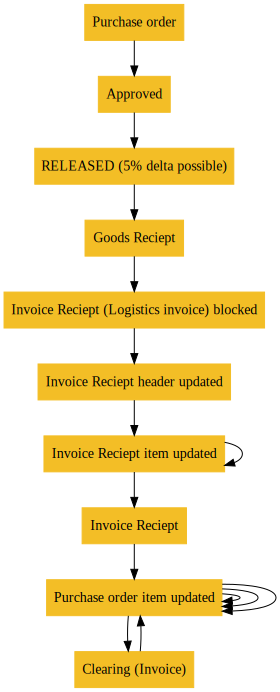

In [12]:
graph

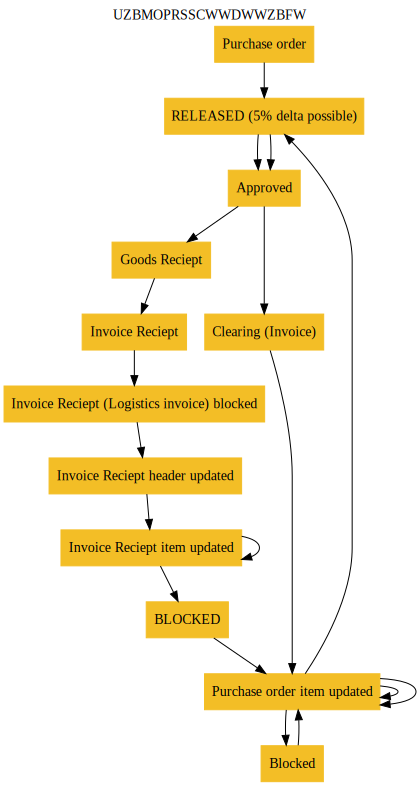

In [266]:
graph